___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [83]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, make_scorer, roc_curve, auc
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.options.display.max_columns = None

In [2]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
female = pd.read_csv('ANSUR II FEMALE Public.csv', encoding='iso-8859-1')
male = pd.read_csv('ANSUR II MALE Public.csv', encoding='iso-8859-1')

## Explore Data

In [4]:
female.columns = [i.lower() for i in female.columns]
male.columns = [i.lower() for i in male.columns]

In [55]:
df = pd.concat([male, female])

In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [56]:
df.reset_index(inplace=True, drop=True)

In [27]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [28]:
df.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,subjectnumericrace,dodrace,age,heightin,weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,20757.198418,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,490.754450,72.252637,324.896506,306.636124,139.723467,1020.084707,241.619974,870.152274,608.999176,497.097561,386.04120,1477.490442,282.859097,1022.098879,251.738464,1252.013184,825.110086,621.851681,351.315920,35.132169,62.625906,22.263349,240.911338,785.914469,98.865359,263.033619,338.766645,295.010712,552.075972,467.007086,1102.049275,84.953362,203.861404,189.286585,152.182762,570.035267,196.334871,332.622940,70.756922,348.385465,385.733355,1040.059492,632.602011,412.037739,432.340804,475.512854,540.124918,483.239618,69.580422,406.479895,119.518787,375.441167,413.834707,1388.404417,113.916612,416.187047,259.192320,1129.362228,354.083553,145.072676,898.107779,866.665293,576.899967,1763.794825,1714.406065,1402.949077,1099.587179,622.198748,176.336355,789.695616,458.244562,129.617996,882.739947,1630.309492,460.524720,317.750000,914.501483,229.674028,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670

In [10]:
df.corr()[['dodrace']].T

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,subjectnumericrace,dodrace,age,heightin,weightlbs
dodrace,0.021578,-0.079167,-0.235121,-0.201095,-0.15836,-0.22907,-0.108116,-0.113672,-0.124767,-0.066587,-0.157624,-0.093332,-0.116689,0.047683,-0.020004,0.100792,-0.085927,-0.063854,-0.167929,-0.1658,-0.150563,-0.084525,-0.228369,-0.157602,-0.113826,-0.077655,-0.211777,-0.177346,-0.129514,-0.146328,-0.079089,-0.04294,-0.02949,-0.11939,-0.251502,-0.05326,-0.121801,-0.106362,-0.118351,-0.103049,-0.108761,-0.176545,-0.17015,-0.163543,-0.085055,0.055987,-0.054221,-0.175424,-0.129768,0.076786,-0.106097,-0.065287,-0.202265,0.140017,-0.130775,-0.133428,-0.168789,-0.181122,-0.167519,-0.216845,-0.037853,-0.044308,-0.11621,-0.131368,-0.184169,-0.074414,-0.185394,-0.089997,-0.1093,-0.210386,-0.07883,-0.252029,-0.165493,-0.148967,-0.132347,-0.23738,-0.225953,-0.200718,-0.042693,-0.060196,-0.11307,-0.179843,-0.021191,-0.171156,-0.193644,-0.176928,-0.132314,-0.103039,-0.082569,-0.140695,-0.21221,-0.13335,-0.181502,-0.257819,0.017987,1.0,0.004738,-0.227227,-0.135988


In [11]:
import plotly.express as px

df_numeric = df.select_dtypes(include ="number")
corr = df_numeric.corr()
fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [12]:
df.subjectsbirthlocation.value_counts()

California       446
New York         420
Texas            397
Indiana          266
Oklahoma         221
                ... 
Ivory Coast        1
Belarus            1
New Zealand        1
South America      1
Denmark            1
Name: subjectsbirthlocation, Length: 152, dtype: int64

In [29]:
df.subjectsbirthlocation.nunique()

152

In [57]:
df.drop(['age', 'primarymos', 'installation', 'subjectid', 'ethnicity', 'subjectnumericrace', 'date', 'weightkg', 'stature', 'writingpreference', 'component', 'branch'], axis=1, inplace=True)

In [31]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [58]:
df = df[df["dodrace"] < 4]

In [59]:
df["dodrace"] = df.dodrace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"})

White       3792
Black       1298
Hispanic     679
Name: dodrace, dtype: int64


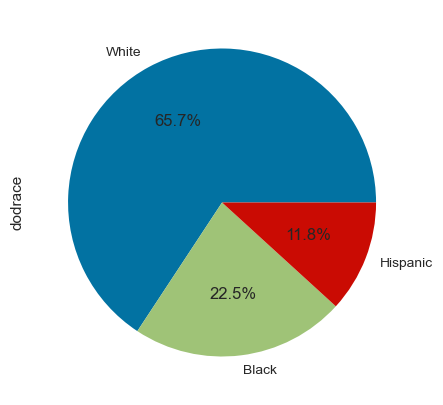

In [60]:
print(df["dodrace"].value_counts())
df["dodrace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(5,5));

In [61]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [62]:
df.isnull().sum().sum()

0

In [63]:
df.duplicated().sum()

0

In [64]:
df.reset_index(inplace=True, drop=True)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [124]:
X= df.drop(columns="dodrace")
y= df['dodrace']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(4615, 95)

(1154, 95)

(4615,)

(1154,)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [68]:
cat = X_train.select_dtypes("object").columns

In [69]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat),
                                                      remainder=MinMaxScaler(),
                                                      verbose_feature_names_out=False)

In [70]:
operations = [("OneHotEncoder", column_trans),
              ("Log_Model", LogisticRegression(class_weight='balanced',
                                         max_iter=10000,
                                         random_state=36))]
model = Pipeline(steps=operations)

In [71]:
model.fit(X_train,y_train)
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[256  14  12]
 [  4 114  21]
 [ 16  91 626]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       282
    Hispanic       0.52      0.82      0.64       139
       White       0.95      0.85      0.90       733

    accuracy                           0.86      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 948   39   29]
 [  21  451   68]
 [  72  361 2626]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1016
    Hispanic       0.53      0.84      0.65       540
       White       0.96      0.86      0.91      3059

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [72]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.492389
train_precision_Hispanic    0.530778
test_recall_Hispanic        0.781481
train_recall_Hispanic       0.835597
test_f1_Hispanic            0.602652
train_f1_Hispanic           0.649169
dtype: float64

### Logistic Model GridsearchCV

In [314]:
log_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'logistic': LogisticRegression(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [77]:
model = Pipeline(steps=operations)
param_grid = {'Log_Model__solver': ['liblinear', 'lbfgs'],
              "Log_Model__penalty" : ["l1", "l2"],
             "Log_Model__C" : [0.01, 0.1, 0.5, 1]}
log_grid_model = GridSearchCV(model, 
                              param_grid = param_grid, 
                              cv=10, 
                              return_train_score=True) 

In [78]:
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'subjectsbirthlocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('Log_Model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=36))]),
             param_grid={'Log_Model__C': [0.01, 0.1, 0.5, 1],
                         'Log_Model__penalty': ['l1', 'l2'],
                         'Log_Model__solver': ['liblinear', 'lbfgs']},
             return_train_score=True)

In [79]:
log_grid_model.best_params_

{'Log_Model__C': 1,
 'Log_Model__penalty': 'l1',
 'Log_Model__solver': 'liblinear'}

In [80]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[259   6  17]
 [  5  91  43]
 [ 11  31 691]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93       282
    Hispanic       0.71      0.65      0.68       139
       White       0.92      0.94      0.93       733

    accuracy                           0.90      1154
   macro avg       0.86      0.84      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 962   17   37]
 [  29  376  135]
 [  54  141 2864]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.93      1016
    Hispanic       0.70      0.70      0.70       540
       White       0.94      0.94      0.94      3059

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



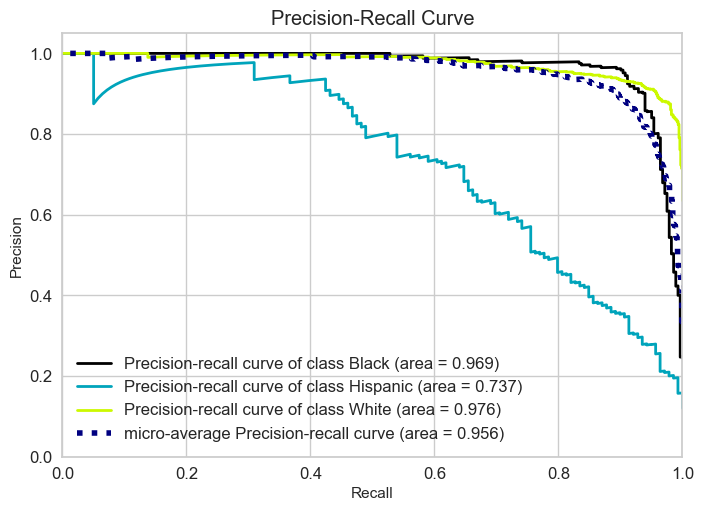

In [82]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(penalty='l1', class_weight='balanced',solver='liblinear', max_iter=10000))]
model = Pipeline(steps= operations)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model 

In [85]:
operations = [("OneHotEncoder", column_trans),
              ("Svc_Model", SVC(class_weight='balanced',
                                         random_state=36))]

model = Pipeline(steps=operations)

In [86]:
model.fit(X_train, y_train)
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[252  16  14]
 [  4 111  24]
 [ 14 106 613]]
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       282
    Hispanic       0.48      0.80      0.60       139
       White       0.94      0.84      0.89       733

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 941   33   42]
 [  23  449   68]
 [  55  419 2585]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92      1016
    Hispanic       0.50      0.83      0.62       540
       White       0.96      0.85      0.90      3059

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [89]:
model = Pipeline(steps=operations)
scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.459463
train_precision_Hispanic    0.495525
test_recall_Hispanic        0.766667
train_recall_Hispanic       0.832305
test_f1_Hispanic            0.573264
train_f1_Hispanic           0.621169
dtype: float64

###  SVC Model GridsearchCV

In [97]:
param_grid = {'Svc_Model__C':[ 0.5,1],
              'Svc_Model__kernel':['linear','rbf'],
              'Svc_Model__gamma':["scale", "auto"]}
model = Pipeline(steps=operations)
svm_grid_model = GridSearchCV(model,
                              param_grid,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [98]:
svm_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'subjectsbirthlocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('Svc_Model',
                                        SVC(class_weight='balanced',
                                            random_state=36))]),
             n_jobs=-1,
             param_grid={'Svc_Model__C': [0.5, 1],
                         'Svc_Model__gamma': ['scale', 'auto'],
                         'Svc_Model__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [102]:
svm_grid_model.best_params_

{'Svc_Model__C': 1, 'Svc_Model__gamma': 'scale', 'Svc_Model__kernel': 'linear'}

In [101]:
eval_metric(svm_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[256  12  14]
 [  6 108  25]
 [ 17  88 628]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.91       282
    Hispanic       0.52      0.78      0.62       139
       White       0.94      0.86      0.90       733

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.88      0.86      0.87      1154


Train_Set
[[ 956   30   30]
 [  20  453   67]
 [  71  342 2646]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1016
    Hispanic       0.55      0.84      0.66       540
       White       0.96      0.86      0.91      3059

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



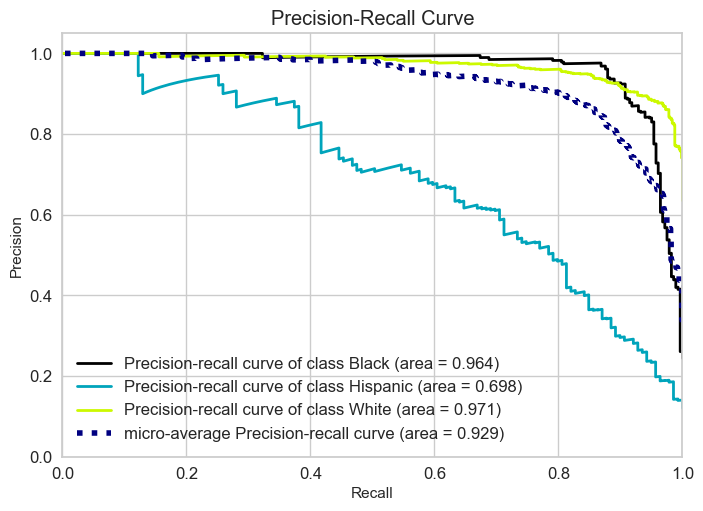

In [104]:
operations = [("OneHotEncoder", column_trans), ("svm", SVC(kernel='linear', class_weight='balanced', random_state=36))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

## 3. RF

### Vanilla RF Model

In [105]:
operations = [("OrdinalEncoder", column_trans), 
                 ("Rf_Model", RandomForestClassifier(class_weight="balanced", 
                                                     random_state=101))]
model = Pipeline(steps=operations)

In [106]:
model.fit(X_train, y_train)
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[191   0  91]
 [  8   9 122]
 [ 10   0 723]]
              precision    recall  f1-score   support

       Black       0.91      0.68      0.78       282
    Hispanic       1.00      0.06      0.12       139
       White       0.77      0.99      0.87       733

    accuracy                           0.80      1154
   macro avg       0.90      0.58      0.59      1154
weighted avg       0.83      0.80      0.76      1154


Train_Set
[[1016    0    0]
 [   0  540    0]
 [   0    0 3059]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1016
    Hispanic       1.00      1.00      1.00       540
       White       1.00      1.00      1.00      3059

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [108]:
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.858333
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.035185
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.066816
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [112]:
param_grid = {"Rf_Model__n_estimators":[250,400,500],
             "Rf_Model__max_depth":[2,3],
             "Rf_Model__min_samples_leaf": [1, 2, 3],}
model = Pipeline(steps=operations)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             n_jobs=-1,
                             return_train_score=True)

In [113]:
rf_grid_model.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'subjectsbirthlocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('Rf_Model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'Rf_Model__max_depth': [2, 3],
                         'Rf_Model__min_samples_leaf': [1, 2, 3],
                         'Rf_Model__n_estimators': [250, 400, 500]},
             return_train_score=True)

In [114]:
rf_grid_model.best_params_

{'Rf_Model__max_depth': 3,
 'Rf_Model__min_samples_leaf': 2,
 'Rf_Model__n_estimators': 500}

In [115]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[214  50  18]
 [ 16  91  32]
 [ 84 240 409]]
              precision    recall  f1-score   support

       Black       0.68      0.76      0.72       282
    Hispanic       0.24      0.65      0.35       139
       White       0.89      0.56      0.69       733

    accuracy                           0.62      1154
   macro avg       0.60      0.66      0.58      1154
weighted avg       0.76      0.62      0.65      1154


Train_Set
[[ 777  161   78]
 [  41  370  129]
 [ 278 1121 1660]]
              precision    recall  f1-score   support

       Black       0.71      0.76      0.74      1016
    Hispanic       0.22      0.69      0.34       540
       White       0.89      0.54      0.67      3059

    accuracy                           0.61      4615
   macro avg       0.61      0.66      0.58      4615
weighted avg       0.77      0.61      0.65      4615



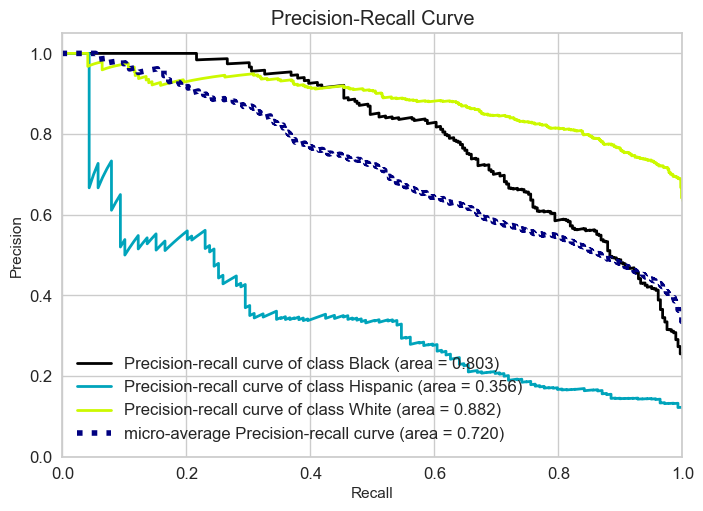

In [116]:
operations = [("OneHotEncoder", column_trans), ("svm", RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=500 ,class_weight='balanced', random_state=36))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)   
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [127]:
operations = [("OrdinalEncoder", column_trans), 
                  ("Xgb_Model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2}) 
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})
model.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'subjectsbirthlocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Xgb_Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, col...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [128]:
eval_metric(model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[244   4  34]
 [  8  57  74]
 [ 13  10 710]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       282
           1       0.80      0.41      0.54       139
           2       0.87      0.97      0.92       733

    accuracy                           0.88      1154
   macro avg       0.86      0.75      0.78      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[1016    0    0]
 [   0  540    0]
 [   0    0 3059]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1016
           1       1.00      1.00      1.00       540
           2       1.00      1.00      1.00      3059

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [130]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}
model = Pipeline(steps=operations)
scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.789091
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.409259
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.535073
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [138]:
param_grid = {"Xgb_Model__n_estimators":[30,35],
              "Xgb_Model__max_depth":[2, 3], 
              "Xgb_Model__learning_rate": [0.055, 0.06],
              "Xgb_Model__subsample": [0.5, 0.8], 
              "Xgb_Model__colsample_bytree":[0.5, 0.8, 1],
              "Xgb_Model__colsample_bylevel":[0.5, 0.8, 1]}
model = Pipeline(steps=operations)
xgb_grid_model = GridSearchCV(model,
                              param_grid,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [139]:
xgb_grid_model.fit(X_train, y_train_xgb)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'subjectsbirthlocation'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('Xgb_Model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=No...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob',
                                                      predictor=None, ...))]),
             n_jobs=-1,
             param_grid={'Xgb_Model__colsample_bylevel': [0.5, 0.8, 1],
                         'Xgb_Model__colsample_bytree': [0.5, 0.8, 1],
                         'Xgb_Model__learning_rate': [0.055, 0.06],
                         'Xgb_Model__max_depth': [2, 3],
                         'Xgb_Model__n_estimators': [30, 35],
                         'Xgb_Model__subsample': [0.5, 0.8]},
             return_train_score=True)

In [140]:
xgb_grid_model.best_params_

{'Xgb_Model__colsample_bylevel': 0.8,
 'Xgb_Model__colsample_bytree': 1,
 'Xgb_Model__learning_rate': 0.06,
 'Xgb_Model__max_depth': 3,
 'Xgb_Model__n_estimators': 35,
 'Xgb_Model__subsample': 0.8}

In [101]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[256  12  14]
 [  6 108  25]
 [ 17  88 628]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.91       282
    Hispanic       0.52      0.78      0.62       139
       White       0.94      0.86      0.90       733

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.88      0.86      0.87      1154


Train_Set
[[ 956   30   30]
 [  20  453   67]
 [  71  342 2646]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1016
    Hispanic       0.55      0.84      0.66       540
       White       0.96      0.86      0.91      3059

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



[00:02:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colssample_bylevel" } are not used.



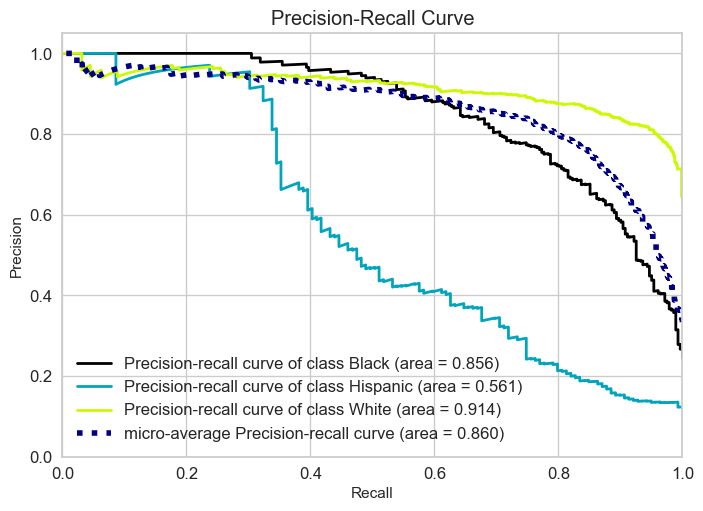

In [141]:
operations = [("OneHotEncoder", column_trans), ("xgb", XGBClassifier(colssample_bylevel=0.8, colsample_bytree=1, learning_rate=0.06,max_depth=3, n_estimators=35, subsample=0.8, random_state=36))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train_xgb)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___